Differentiated Thyroid Cancer Recurrence (https://www.kaggle.com/datasets/dhruvlotia/differentiated-thyroid-cancer-recurrence)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.inspection import permutation_importance

# Read in csv
df = pd.read_csv('Thyroid_Diff.csv')
df = df.reset_index(drop=True)

# X = parameters; y = predictor
X = df.drop('Recurred',axis=1).copy()
y = df['Recurred'].copy()
y = y.replace({'No': 0, 'Yes': 1})

# One hot encode categorical data
column_names = df.columns.tolist()
column_names = column_names[1:-1]
X_encoded = pd.get_dummies(X, columns=column_names)

Train/Test/Split/Scale

In [2]:
# Default is a 70/30 split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

SVM Model/ Confusion Matrix

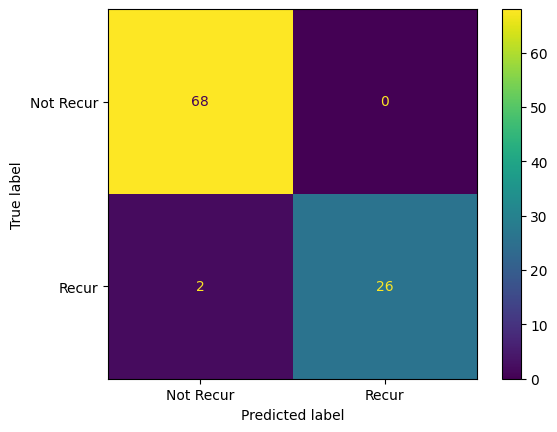

In [3]:
# Default kernel = 'rbf'
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

# Plot confusion matrix to visualize model performance on training set
predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Recur', 'Recur'])
disp.plot(values_format='d')

Visualize Feature Importance

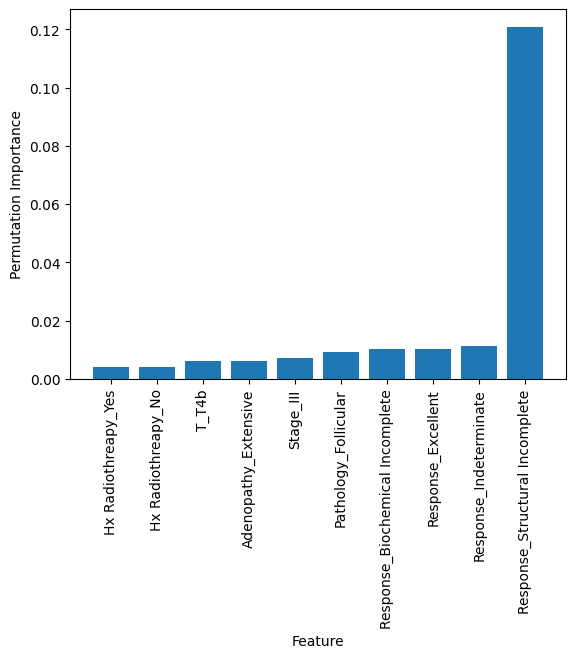

In [4]:
# The 'rbf' kernel is not in the same space as the input features
# Thus, we can't use classic feature importance like when kernel = 'linear'
# We can approximate the importances by first doing n-repeating permutations
perm_importance = permutation_importance(clf_svm, X_test_scaled, y_test, n_repeats=10, random_state=42)
feature_names = X_train.columns

# Plot the permutation importance
sorted_idx = perm_importance.importances_mean.argsort()
top_n = 10
sorted_idx_top_n = sorted_idx[-top_n:]
plt.bar(feature_names[sorted_idx_top_n], perm_importance.importances_mean[sorted_idx_top_n])
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.xticks(rotation=90)
plt.show()

Verifying Feature Importance

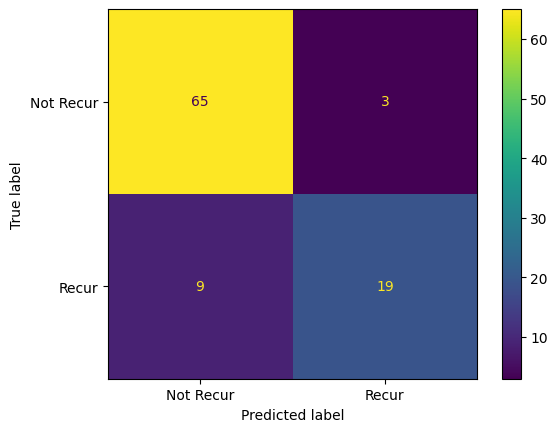

In [5]:
# What happens to the confusion matrix when we drop the response column?
# Expectation is that the false positive/ false negative rates should increase
df = pd.read_csv('Thyroid_Diff.csv')
df = df.reset_index(drop=True)
df = df.drop('Response', axis=1)

X = df.drop('Recurred',axis=1).copy()
y = df['Recurred'].copy()
y = y.replace({'No': 0, 'Yes': 1})

column_names = df.columns.tolist()
column_names = column_names[1:-1]
X_encoded = pd.get_dummies(X, columns=column_names)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled,y_train)

predictions = clf_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Recur', 'Recur'])
disp.plot(values_format='d')